# Credit Risk Analysis Prediction

In [ ]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import time
import statsmodels.api as sm

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 1. Exploratory Data Analysis

In [2]:
# Read the csv dataset into a pandas dataframe
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\mryan\AppData\Local\Temp\ipykernel_20544\2392982311.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


In [3]:
# Check out how many columns and rows are in the dataframe
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# Take a look at the descriptive statistics
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


From the "count" row of the first column, we can see that there are 466285 total users. We need to note that there are columns with less "count" of data, namely "delinq_2yrs","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_util","total_acc","collections_12_mths_ex_med","mths_since_last_major_derog","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","total_cur_bal", and the columns after that.

## 1.1 Data Cleaning

Refer to ID/X Partners Virtual Internship Reading No. 5, "Machine Learning Data Preparation"

In [6]:
# Check for duplicates in the 'id' column
duplicates = df[df.duplicated('id', keep=False)]

# Display the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, a

In [7]:
# Delete columns that ONLY has NaN values AND no other value

df_rev = df.dropna(axis=1, how='all')

In [8]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

- The first column, "Unnamed: 0", is showing the index number (row number) of every data, so it acts the same as a pandas index.

- The data type of funded_amt_inv is float64, but funded_amt is int64 which we might want to standardize. Looking at the data dictionary, there is no definition of what the column funded_amnt_inv contains so it might be a problem

- There are still missing values in a few columns, namely "emp_title", "emp_length", "annual_inc", "desc","title","delinq_2yrs","earliest_cr_line","inq_last_6mths", and others. I would like to look into these data

In [9]:
# Select the rows where 'delinq_2yrs' column has missing values
missing_delinq = df[df['delinq_2yrs'].isnull()]

# Display the rows with missing values in 'delinq_2yrs' column
print(missing_delinq)

       Unnamed: 0     id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
42449       42449  79967      79912       5000         5000           3025.0   
42450       42450  79924      79906       7000         7000           3450.0   
42459       42459  71823      70473       4350         4350            825.0   
42472       42472  72197      72194       3900         3900           2025.0   
42480       42480  79893      79878       6700         6700           6700.0   
42483       42483  73003      70651       3200         3200           2000.0   
42494       42494  72819      72816       7200         5075            350.0   
42509       42509  91023      70879       1900         1900            900.0   
42514       42514  85961      85923       1200         1200            500.0   
42515       42515  85818      85802       5000         5000            375.0   
42516       42516  85781      85727       1400         1400            475.0   
42517       42517  85675      85667     

There are 29 data that, not only has NaN values in the delinq_2yrs column, but has missing values in more than 9 columns. It would be better to delete these data because we have much more amount of data, so it wouldn't damage our analysis.

An interesting note is that these 29 data is in the range of 42449-42534, so there might be human errors with data that came from there, might be worth looking into by asking other sources.

In [10]:
# Update the DataFrame to contain data that only has values in the delinq_2yrs column
df_rev = df_rev.dropna(subset=['delinq_2yrs'])
print(df_rev)

        Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83   

In [11]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466256 non-null  int64  
 1   id                           466256 non-null  int64  
 2   member_id                    466256 non-null  int64  
 3   loan_amnt                    466256 non-null  int64  
 4   funded_amnt                  466256 non-null  int64  
 5   funded_amnt_inv              466256 non-null  float64
 6   term                         466256 non-null  object 
 7   int_rate                     466256 non-null  float64
 8   installment                  466256 non-null  float64
 9   grade                        466256 non-null  object 
 10  sub_grade                    466256 non-null  object 
 11  emp_title                    438680 non-null  object 
 12  emp_length                   445248 non-null  object 
 13  home

A few interesting notes:
- From deleting the data previously, the row amount of data is now 466256
- tot_coll_amt, tot_cur_bal, total_rev_hi_lim has the same amount of non-null data which is 396009
- desc, mths_since_last_delinq, mths_since_last_record, mths_since_last_major_derog only has less than 50% of non-null data

According to the data dictionary, the definitions of the columns are:
- desc : Reason for credit
- mths_since_last_major_derog : Months since most recent 90-day or worse rating
- mths_since_last_delinq : Months since last pelanggaran
- mths_since_last_record : Months since last public record
- tot_coll_amt : Total collection amounts ever owed
- tot_cur_bal : Total current balance
- total_rev_hi_lim : Total revolving high credit/credit limit

In [12]:
# Get the columns with NaN values and their count
na_columns = df_rev.columns[df_rev.isna().any()]
na_counts = df_rev[na_columns].isna().sum()

# Get the data types of the columns
column_dtypes = df_rev[na_columns].dtypes

# Display the columns with NaN values, their counts, and data types
print("Columns with NaN values and their counts:")
for column in na_columns:
    count = na_counts[column]
    dtype = column_dtypes[column]
    print(f"{column} ({dtype}): {count}")

Columns with NaN values and their counts:
emp_title (object): 27576
emp_length (object): 21008
desc (object): 340303
title (object): 21
mths_since_last_delinq (float64): 250322
mths_since_last_record (float64): 403618
revol_util (float64): 311
last_pymnt_d (object): 376
next_pymnt_d (object): 227214
last_credit_pull_d (object): 41
collections_12_mths_ex_med (float64): 116
mths_since_last_major_derog (float64): 367282
tot_coll_amt (float64): 70247
tot_cur_bal (float64): 70247
total_rev_hi_lim (float64): 70247


In [13]:
# Fill NaN values for columns with 0

df_rev['tot_coll_amt'].fillna(0, inplace=True)
df_rev['tot_cur_bal'].fillna(0, inplace=True)
df_rev['total_rev_hi_lim'].fillna(0, inplace=True)
df_rev['mths_since_last_delinq'].fillna(0, inplace=True)
df_rev['mths_since_last_record'].fillna(0, inplace=True)
df_rev['collections_12_mths_ex_med'].fillna(0, inplace=True)
df_rev['mths_since_last_major_derog'].fillna(0, inplace=True)

# Replace NA values in 'next_pymnt_d' with values from 'last_pymnt_d'
df_rev['next_pymnt_d'].fillna(df_rev['last_pymnt_d'], inplace=True)

# Replace NA values in 'last_pymnt_d' with values from 'next_pymnt_d'
df_rev['last_pymnt_d'].fillna(df_rev['next_pymnt_d'], inplace=True)

# Replace NA values in 'revol_util' with values from 'revol_bal'
df_rev['revol_util'].fillna(df_rev['revol_bal'], inplace=True)

# Replace NA values in 'last_credit_pull_d' with values from 'last_pymnt_d'
df_rev['last_credit_pull_d'].fillna(df_rev['last_pymnt_d'], inplace=True)

# Replace NA values in 'title' with values from 'purpose'
df_rev['title'].fillna(df_rev['purpose'], inplace=True)

# Replace NA values in 'emp_title' with object 'none'
df_rev['emp_title'].fillna('none', inplace=True)

# Replace NA values in 'emp_length' with object 'none'
df_rev['emp_length'].fillna('none', inplace=True)

# Desc column does not have any purpose, so we can drop it
df_rev = df_rev.drop(['desc', 'Unnamed: 0'], axis=1)

There are only 364 rows that has no last payment date or next payment date, let's look into the rows

In [14]:
print(df_rev[df_rev['last_pymnt_d'].isna()]['loan_status'].value_counts())

loan_status
Charged Off    364
Name: count, dtype: int64


All the data that has no last payment date also has loan_status as "Charged Off". A charge-off occurs when an account is seriously delinquent — for credit cards, that's after 180 days of not making the minimum payment. There might be a deeper reason on to why this is, it would be better to ask the financial department about the technicalities of the payment dates for charged-off accounts, because not every charged-off account has empty payment dates.

For the sake of simplicity, let's replace the NA values for the payment dates of those accounts to their last credit pull date.

In [15]:
# Replace NA values in 'last_credit_pull_d' with values from 'last_credit_pull_d'
df_rev['last_pymnt_d'].fillna(df_rev['last_credit_pull_d'], inplace=True)

# Replace NA values in 'next_pymnt_d' with values from 'last_pymnt_d'
df_rev['next_pymnt_d'].fillna(df_rev['last_pymnt_d'], inplace=True)

## 1.2 Data Preparation

Refer to ID/X Partners Virtual Internship Reading No. 5, “Machine Learning Data Preparation”

The main goal of a credit risk analysis is to assess whether giving credit to a client, based on their background, will secure a safe return or not. From the dataset above, the column "loan_status" gives us the list of clients that have not paid their credit back within the agreed-upon period. We will use 0/1 labelling for the label, 0 indicating that the client is not risky and 1 indicating that it is risky to give loans to the client.

In [16]:
# Get the list of values that are in the loan_status column
print(df_rev['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [17]:
# loan_status values will be converted to Label
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df_rev.loc[:, 'label'] = df_rev['loan_status'].apply(classify_label)

In [18]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466256 non-null  int64  
 1   member_id                    466256 non-null  int64  
 2   loan_amnt                    466256 non-null  int64  
 3   funded_amnt                  466256 non-null  int64  
 4   funded_amnt_inv              466256 non-null  float64
 5   term                         466256 non-null  object 
 6   int_rate                     466256 non-null  float64
 7   installment                  466256 non-null  float64
 8   grade                        466256 non-null  object 
 9   sub_grade                    466256 non-null  object 
 10  emp_title                    466256 non-null  object 
 11  emp_length                   466256 non-null  object 
 12  home_ownership               466256 non-null  object 
 13  annu

In [19]:
# Print the unique values of every column to analyze deeper

pd.Series({col:df_rev[col].unique() for col in df_rev})

id                             [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                      [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                      [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                    [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv                [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
term                                                    [ 36 months,  60 months]
int_rate                       [10.65, 15.27, 15.96, 13.49, 12.69, 7.9, 18.64...
installment                    [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
grade                                                      [B, C, A, E, F, D, G]
sub_grade                      [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title                      [none, Ryder, AIR RESOURCES BOARD, University ...
emp_length                     [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership              

In [20]:
# Convert date columns with object data type into datetime data type

# Convert 'last_pymnt_d' to datetime format
df_rev['last_pymnt_d'] = pd.to_datetime(df_rev['last_pymnt_d'], format='%b-%y').dt.date

# Convert 'issue_d' to datetime format
df_rev['issue_d'] = pd.to_datetime(df_rev['issue_d'], format='%b-%y').dt.date

In [21]:
# Columns policy_code and application_type only has 1 unique value, we can drop them
df_rev = df_rev.drop(['policy_code','application_type'],axis = 1)

# Drop columns that has no relevancy in exploring the data
df_rev = df_rev.drop(['url','id','member_id','title','earliest_cr_line','last_credit_pull_d','next_pymnt_d','emp_title'],axis = 1)

We can use ordinal encoding on columns that has categorical values where we can infer a hierarchy for the values inside. The columns (and their hierarchy) are:
- term (36 Months, 60 Months)
- grade (G,F,E,D,C,B,A)
- emp_length (<1 year, 1 year, 2 years, ..., 10+ years)
- home_ownership (NONE, ANY, OTHER, RENT, MORTGAGE, OWN)
- verification_status (Not Verified, Verified, Source Verified)
- pymnt_plan (n,y)
- intitial_list_status (f,w)

In [22]:
# Ordinal encoding for the columns
def OrdinalEncoder1(text):
    if text == "F":
        return 1
    if text == "E":
        return 2
    elif text == "D":
        return 3
    elif text == "C":
        return 4
    elif text == "B":
        return 5
    elif text == "A":
        return 6
    else:
        return 0


def OrdinalEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

def OrdinalEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

def OrdinalEncoder4(text):
    if text == "Verified":
        return 1
    if text == "Source Verified":
        return 2
    else:
        return 0

def OrdinalEncoder5(text):
    if text == "y":
        return 1
    else:
        return 0

def OrdinalEncoder6(text):
    if "60" in text:
        return 1
    else:
        return 0

def OrdinalEncoder7(text):
    if text == "f":
        return 0
    else:
        return 1

df_rev["grade"] = df_rev["grade"].apply(OrdinalEncoder1)
df_rev["emp_length"] = df_rev["emp_length"].apply(OrdinalEncoder2)
df_rev["home_ownership"] = df_rev["home_ownership"].apply(OrdinalEncoder3)
df_rev["verification_status"] = df_rev["verification_status"].apply(OrdinalEncoder4)
df_rev["pymnt_plan"] = df_rev["pymnt_plan"].apply(OrdinalEncoder5)
df_rev["term"] = df_rev["term"].apply(OrdinalEncoder6)
df_rev["initial_list_status"] = df_rev["initial_list_status"].apply(OrdinalEncoder7)

In [23]:
df_rev.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label
count,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662560e+05,...,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662560e+05,4.662560e+05,4.662560e+05,466256.000000
mean,14317.925292,14292.451733,14223.162366,0.275239,13.829513,432.080469,4.182854,7.000296,1.684270,7.327749e+04,...,85.337081,8.957759,3124.095683,0.009083,9.096479,0.004002,1.629995e+02,1.178896e+05,2.580212e+04,0.118667
std,8286.339281,8274.197912,8297.216946,0.446635,4.357561,243.480184,1.320386,4.203083,0.629216,5.496301e+04,...,552.186700,85.456480,5554.861293,0.108635,20.166174,0.068637,1.348331e+04,1.487214e+05,3.600588e+04,0.323396
min,500.000000,500.000000,0.000000,0.000000,5.420000,15.670000,0.000000,0.000000,0.000000,1.896000e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,8000.000000,8000.000000,0.000000,10.990000,256.760000,3.000000,3.000000,1.000000,4.500000e+04,...,0.000000,0.000000,312.620000,0.000000,0.000000,0.000000,0.000000e+00,1.547300e+04,8.900000e+03,0.000000
50%,12000.000000,12000.000000,12000.000000,0.000000,13.660000,379.915000,4.000000,7.000000,2.000000,6.300000e+04,...,0.000000,0.000000,545.960000,0.000000,0.000000,0.000000,0.000000e+00,5.249050e+04,1.920000e+04,0.000000
75%,20000.000000,20000.000000,19950.000000,1.000000,16.490000,566.620000,5.000000,12.000000,2.000000,8.895150e+04,...,0.000000,0.000000,3188.432500,0.000000,0.000000,0.000000,0.000000e+00,1.849445e+05,3.430000e+04,0.000000
max,35000.000000,35000.000000,35000.000000,1.000000,26.060000,1409.990000,6.000000,12.000000,3.000000,7.500000e+06,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,1.000000


## 1.3 Data Visualizations

Refer to ID/X Partners Virtual Internship Reading No. 6, “Data Visualization”

Text(0.5, 1.0, 'x')

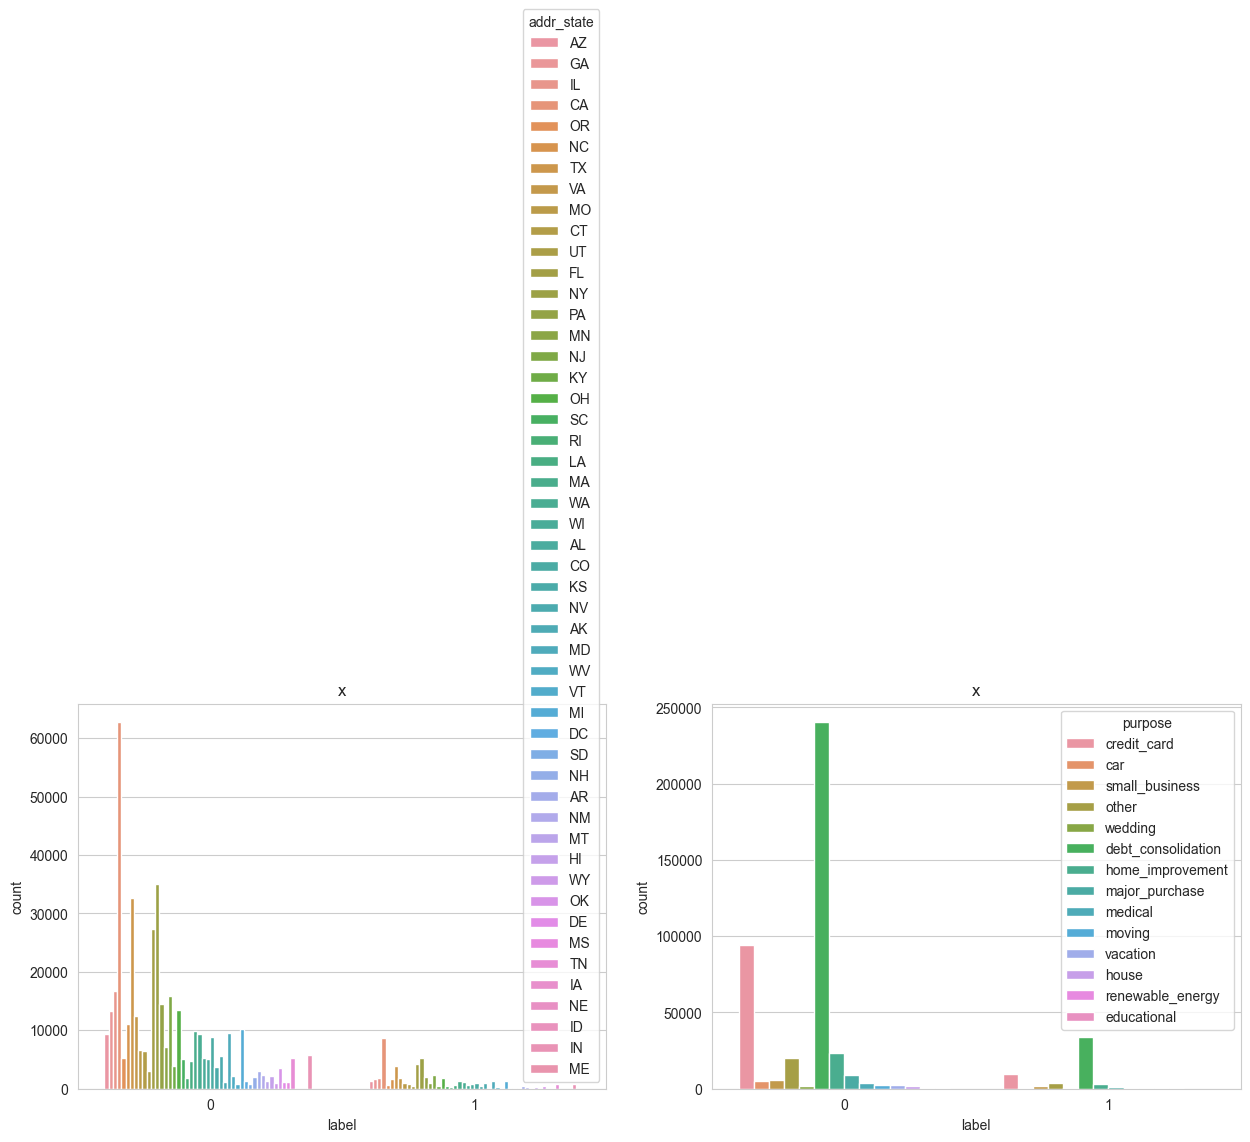

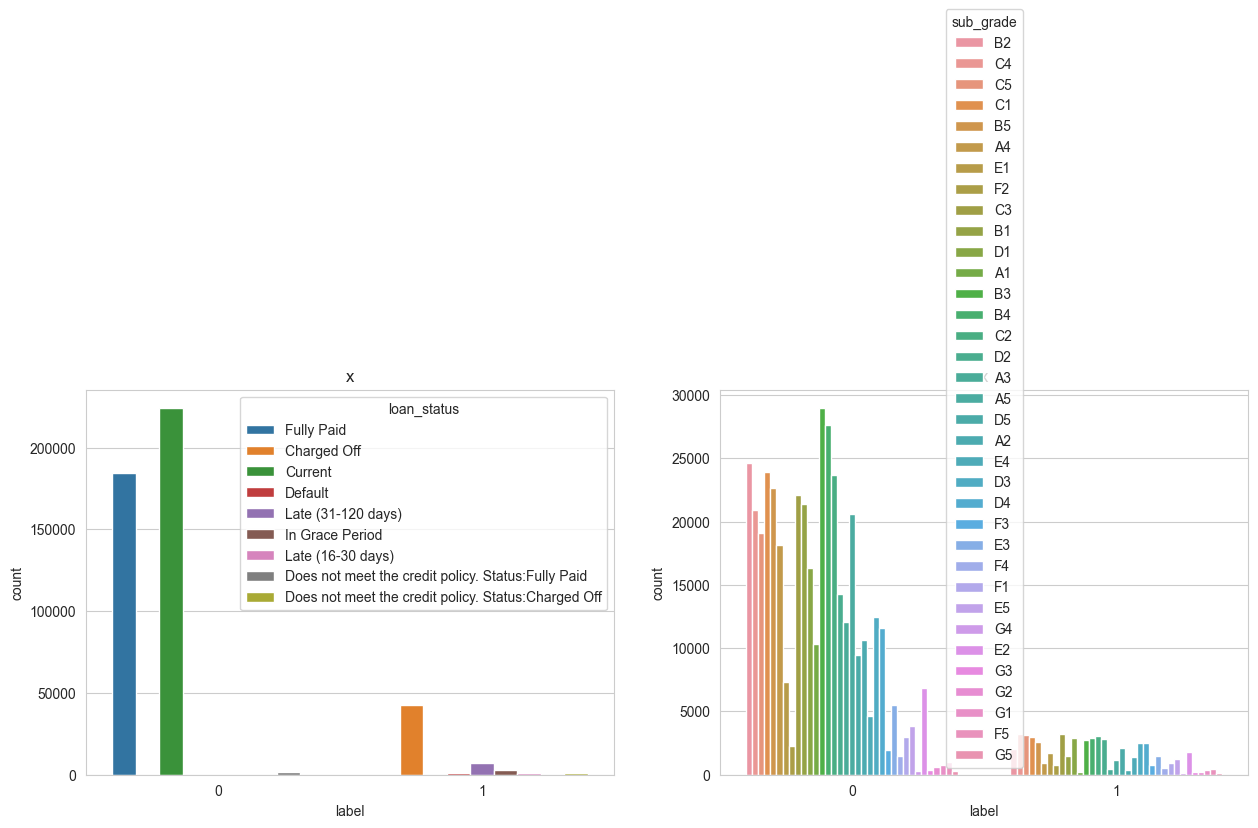

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_rev, x='label', hue='addr_state', ax=ax[0]).set_title("x")
sns.countplot(data=df_rev, x='label', hue='purpose', ax=ax[1]).set_title("x")

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_rev, x='label', hue='loan_status', ax=ax[0]).set_title("x")
sns.countplot(data=df_rev, x='label', hue='sub_grade', ax=ax[1]).set_title("x")

From the histograms above, we can see that the count of credit loan failures distribute relatively linearly to the address and purpose. In other words:
- If there are more accounts at an address, there will be more credit loan failures at said address and
- If there are more accounts within a purpose, there will be more credit loan failures on said purpose (except "other")

Let's conduct a hypothesis test for the linearity of the label amount for addr_state:

In [25]:
# Group the DataFrame by 'addr_state' and calculate the counts of label 0 and label 1
grouped = df_rev.groupby('addr_state')['label'].value_counts().unstack(fill_value=0)

# Calculate the total count of labels (0+1) in each state
grouped['total_count'] = grouped.sum(axis=1)

# Perform linear regression analysis
X = grouped['total_count']
y = grouped[1]  # Label 1 count

# Add a constant to the X variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6009.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.34e-52
Time:                        06:31:03   Log-Likelihood:                -316.40
No. Observations:                  50   AIC:                             636.8
Df Residuals:                      48   BIC:                             640.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -29.5244     24.440     -1.208      

The OLS regression results suggest a highly significant relationship between the total count of labels (0+1) and the count of label 1 in each state. The R-squared value of 0.992 indicates that approximately 99.2% of the variation in the count of label 1 can be explained by the linear relationship with the total count of labels.

Here are some key results from the regression analysis:

- The coefficient for the constant term (const) is -29.5244, but it is not statistically significant at the chosen significance level (p-value = 0.233).
- The coefficient for the total count of labels (total_count) is 0.1218, and it is highly statistically significant (p-value < 0.001). This suggests that for every one-unit increase in the total count of labels, the count of label 1 increases by approximately 0.1218.
- It's important to note that the condition number of 1.94e+04 is large, indicating the possibility of multicollinearity or other numerical issues in the model.

Overall, based on these results, there is evidence to support the hypothesis that the count of label 1 in proportion to the total count of labels follows a linear relationship in each state.

In [26]:
# Columns policy_code and application_type only has 1 unique value, we can drop them
df_rev = df_rev.drop(['addr_state','zip_code','purpose','loan_status','sub_grade'],axis = 1)

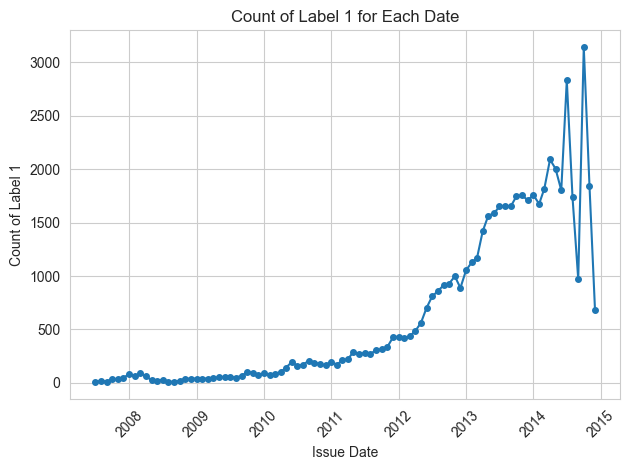

In [27]:
# Group the DataFrame by 'issue_d' and count the occurrences of label 1 for each date
grouped = df_rev[df_rev['label'] == 1].groupby('issue_d').size()

# Plot the line chart
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-', markersize=4)
plt.xlabel('Issue Date')
plt.ylabel('Count of Label 1')
plt.title('Count of Label 1 for Each Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

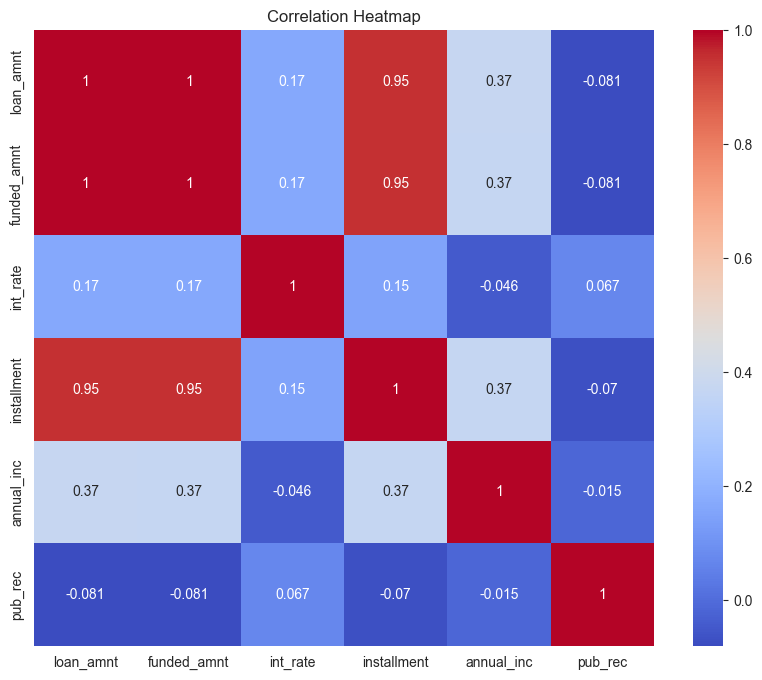

In [28]:
# Select a subset of variables for the heatmap
subset_vars = df[['loan_amnt', 'funded_amnt', 'int_rate', 'installment','annual_inc','pub_rec']]

# Calculate the correlation matrix
corr_matrix = subset_vars.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

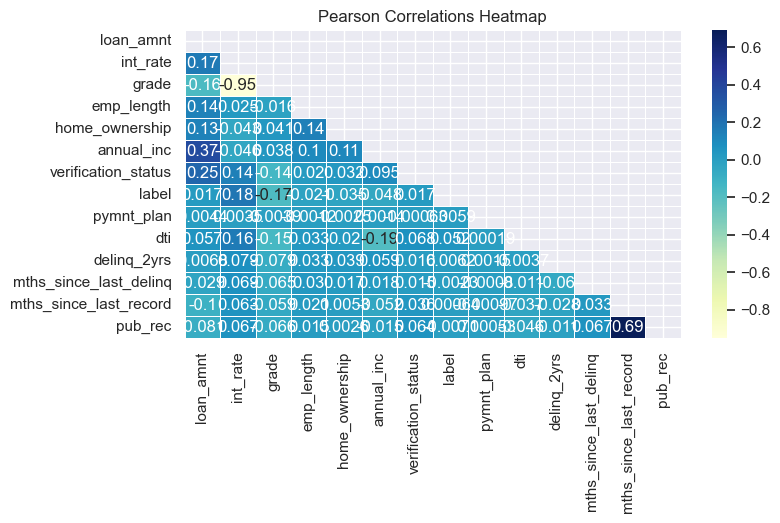

In [145]:
corr = df_rev[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','verification_status','label',
                    'pymnt_plan','dti','delinq_2yrs','mths_since_last_delinq','mths_since_last_record','pub_rec']].corr()
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool_)))\
    .set_title("Pearson Correlations Heatmap");

# 2. Feature Selection

## 2.1 Address Imbalanced Data

Refer to Google Advanced Data Analytics Professional Certification, "Addresing Imbalanced Data"

In [30]:
# Count the values to show how many data we have for each label
print(df_rev[['label']].value_counts())

label
0        410927
1         55329
Name: count, dtype: int64


We are faced with an unbalanced data problem. Based on the previous learning sessions, we know that to solve the unbalanced data problem there are two approaches that can be taken.
- Undersampling
- Oversampling

Considering our model is a credit risk prediction model, undersampling will be a better approach to keep the "1" labelled data as true as possible

In [31]:
# Separate the majority and minority classes
majority_class = df_rev[df_rev['label'] == 0]
minority_class = df_rev[df_rev['label'] == 1]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                replace=False,  # Sampling without replacement
                                n_samples=len(minority_class),  # Match the number of samples in the minority class
                                random_state=42)  # Set a random seed for reproducibility

# Combine the undersampled majority class with the minority class
df_undersampled = pd.concat([undersampled_majority, minority_class])

# Shuffle the DataFrame
df_undersampled = df_undersampled.sample(frac=1, random_state=42)

# Print the value counts of the undersampled data
print(df_undersampled['label'].value_counts())

label
1    55329
0    55329
Name: count, dtype: int64


## 2.2 Feature Selection

In [32]:
# Declare feature vector and target variable
X = df_undersampled.drop(['label','issue_d','last_pymnt_d','total_pymnt_inv','out_prncp_inv'], axis = 1)
y = df_undersampled['label']

In [33]:
# Split the data into a training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
# Create an instance of SelectKBest with chi2 scoring function and k=30
selector = SelectKBest(chi2, k=30).fit(X_train, y_train)

# Get the chi-square scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Calculate the proportion of explained data for each feature
explained_data = scores / sum(scores)

# Create a DataFrame to store the scores and p-values
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'p-value': p_values})

# Sort the DataFrame by descending order of scores
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Print the ordered feature scores
print(feature_scores)

                        Feature         Score        p-value
35                  tot_cur_bal  1.352460e+08   0.000000e+00
30              last_pymnt_amnt  8.625397e+07   0.000000e+00
25              total_rec_prncp  8.300711e+07   0.000000e+00
24                  total_pymnt  4.494570e+07   0.000000e+00
23                    out_prncp  3.459853e+07   0.000000e+00
28                   recoveries  2.668904e+07   0.000000e+00
36             total_rev_hi_lim  2.388129e+07   0.000000e+00
9                    annual_inc  1.632811e+07   0.000000e+00
29      collection_recovery_fee  2.833547e+06   0.000000e+00
19                    revol_bal  1.550789e+06   0.000000e+00
0                     loan_amnt  3.485343e+05   0.000000e+00
1                   funded_amnt  3.203624e+05   0.000000e+00
2               funded_amnt_inv  2.155851e+05   0.000000e+00
34                 tot_coll_amt  9.625026e+04   0.000000e+00
27           total_rec_late_fee  7.817339e+04   0.000000e+00
26                total_

## 3. Model Selection

In [37]:
X_train_2 = selector.transform(X_train)
X_test_2 = selector.transform(X_test)

## 3.1 Random Forest Classification

Refer to ID/X Partners Virtual Internship Reading No. 9, “Machine Learning: Ensemble Methods”

In [89]:
# Random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)

Accuracy is:  0.9099074429048688
Recall is:  0.8435020519835841
F1 Score is:  0.9035756154747948
Precision is:  0.9728621016093405


<Axes: >

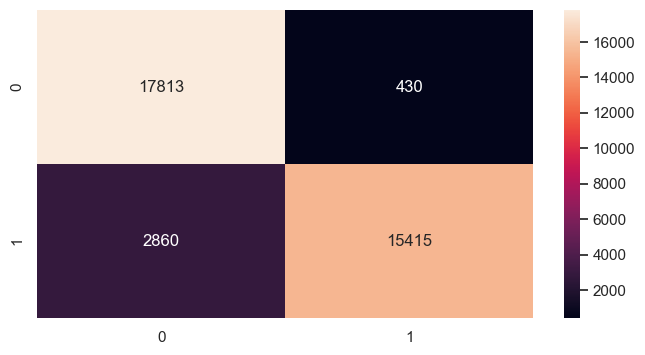

In [147]:
acc_rf = accuracy_score(y_test,clf_rf_2.predict(X_test_2))
recall_rf = recall_score(y_test,clf_rf_2.predict(X_test_2))
pre_rf = precision_score(y_test,clf_rf_2.predict(X_test_2))
f1_rf = f1_score(y_test,clf_rf_2.predict(X_test_2))
print('Accuracy is: ',acc_rf)
print('Recall is: ',recall_rf)
print('F1 Score is: ',f1_rf)
print('Precision is: ', pre_rf)
cm_1 = confusion_matrix(y_test,clf_rf_2.predict(X_test_2))
sns.heatmap(cm_1,annot=True,fmt="d")

## 3.2 K-Nearest Neighbors

Refer to ID/X Partners Virtual Internship Reading No. 7, “Supervised Learning”

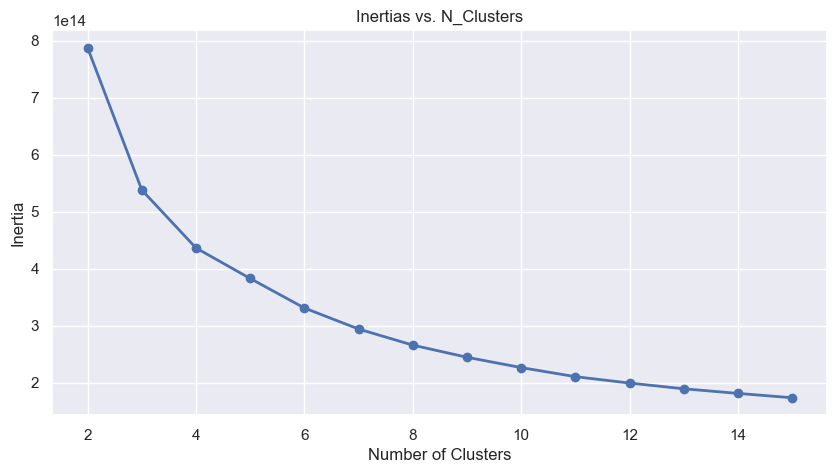

In [40]:
inertias = []

for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0).fit(X_train_2)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.title('Inertias vs. N_Clusters')
plt.plot(np.arange(2, 16), inertias, marker='o', lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [83]:
max_score = 0
max_k = 0
for k in range(1, 50):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_2,y_train)
    score = f1_score(y_test, neigh.predict(X_test_2),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [84]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 16  to get the best prediction, then the average accuracy is  0.8094090585464703


In [85]:
# Train the model with the optimal value of k
neigh = KNeighborsClassifier(n_neighbors=max_k)
neigh.fit(X_train_2, y_train)

KNeighborsClassifier(n_neighbors=16)

Accuracy is:  0.8094090585464703
Recall is:  0.7147469220246238
Precision is:  0.8820311972449186
F1 Score is:  0.789626405513239


<Axes: >

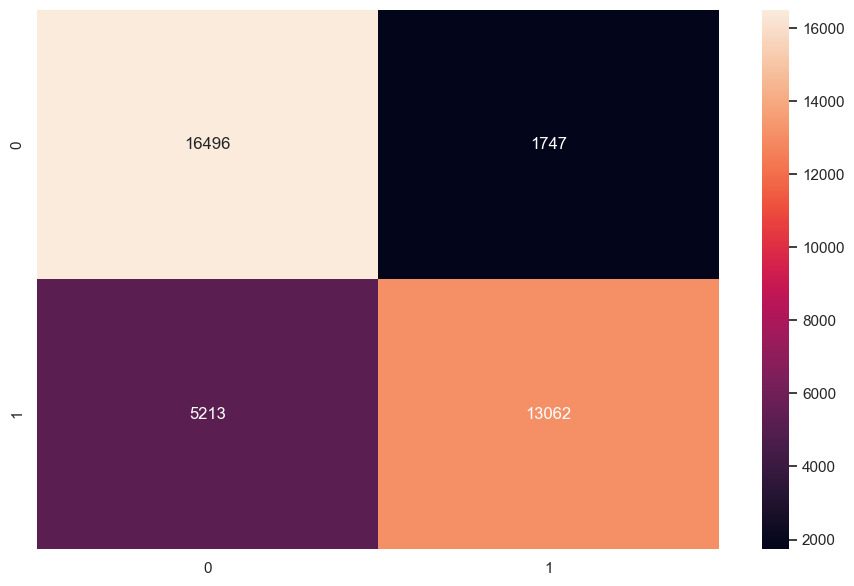

In [91]:
acc_knn = accuracy_score(y_test,neigh.predict(X_test_2))
recall_knn = recall_score(y_test,neigh.predict(X_test_2))
pre_knn = precision_score(y_test,neigh.predict(X_test_2))
f1_knn = f1_score(y_test,neigh.predict(X_test_2))
print('Accuracy is: ',acc_knn)
print('Recall is: ',recall_knn)
print('Precision is: ',pre_knn)
print('F1 Score is: ',f1_knn)
cm_1 = confusion_matrix(y_test,neigh.predict(X_test_2))
sns.heatmap(cm_1,annot=True,fmt="d")

## 3.3 XGBoost

Refer to ID/X Partners Virtual Internship Reading No. 9, “Machine Learning: Ensemble Methods”

In [41]:
# Model Training
RANDOM_STATE = 42
LR = 0.01
TEST_SIZE = 0.33
MAX_DEPTH = 0
NTHREAD = 2
EVAL_METRIC = 'logloss'
BOOSTER = 'gbtree'
VERBOSITY = 1

In [42]:
xgboost = XGBClassifier(
                        random_state=RANDOM_STATE,
                        learning_rate=LR,
                        booster=BOOSTER,
                        nthread=NTHREAD,
                        eval_metric=EVAL_METRIC,
                        verbosity=VERBOSITY
                        )

In [43]:
start = time.time() # Time before training

# Fit the model with the training data
xgboost.fit(X_train_2, y_train)

end = time.time() # Time after training

# Compute how much time the model need to train
print(f'Training took {round(end-start,2)} seconds to be completed!')

Training took 11.35 seconds to be completed!


In [93]:
# predict the target on the train dataset
predict_train = xgboost.predict(X_train_2)
print('\nTarget on train data',predict_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
xgb_predict_test = xgboost.predict(X_test_2)
print('\nTarget on test data',xgb_predict_test)

# Accuracy Score on test dataset
acc_xgb = accuracy_score(y_test,xgb_predict_test)
print('\naccuracy_score on test dataset : ', acc_xgb)


Target on train data [1 1 1 ... 1 1 1]

accuracy_score on train dataset :  0.8934987860803885

Target on test data [0 1 0 ... 0 0 1]

accuracy_score on test dataset :  0.8936688756229805


In [95]:
recall_xgb = recall_score(y_test,xgb_predict_test)
pre_xgb = precision_score(y_test,xgb_predict_test)
f1_xgb = f1_score(y_test,xgb_predict_test)
print(f'The accuracy in the test set was {acc_xgb}, the recall was {recall_xgb}, the precision was {pre_xgb} and the f1 score was {f1_xgb}')

The accuracy in the test set was 0.8936688756229805, the recall was 0.800328317373461, the precision was 0.9842530282637955 and the f1 score was 0.8828127357778784


Text(0.5, 1.0, 'Confusion Matrix')

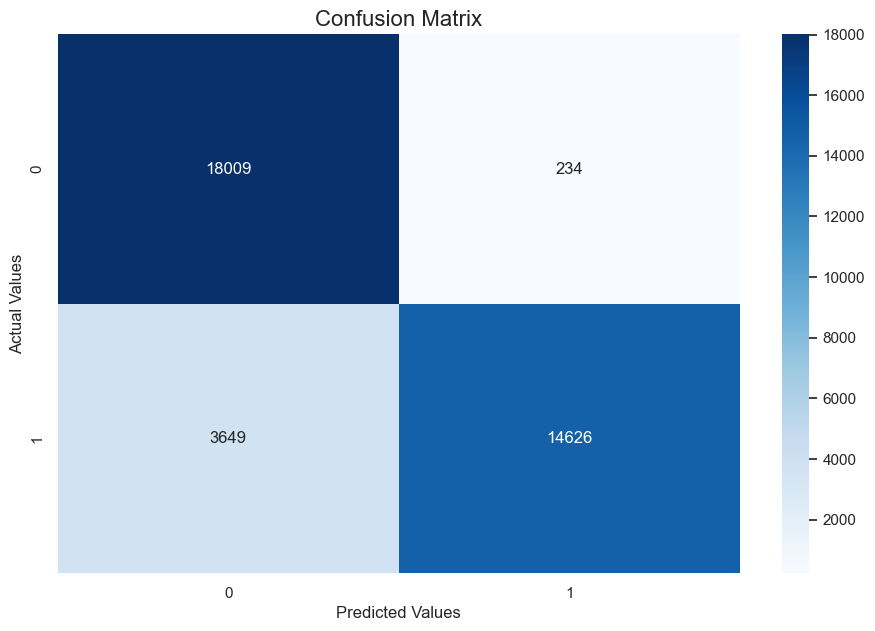

In [96]:
cm_3 = confusion_matrix(y_test, xgb_predict_test)
cm_plot = sns.heatmap(cm_3,
                      annot=True,
                      cmap='Blues',
                      fmt='d');
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')
cm_plot.set_title('Confusion Matrix', size=16)

## 3.4 Naive Bayes

Refer to ID/X Partners Virtual Internship Reading No. 7, “Supervised Learning”

In [47]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train_2, y_train)

GaussianNB()

In [48]:
y_pred = gnb.predict(X_test_2)

y_pred_train = gnb.predict(X_train_2)

In [49]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7215


In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7215


In [51]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train_2, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test_2, y_test)))

Training set score: 0.7215
Test set score: 0.7215


Accuracy is:  0.7214524344159045
Recall is:  0.4467305061559508
Precision is:  0.4467305061559508
F1 Score is:  0.6161509433962266


<Axes: >

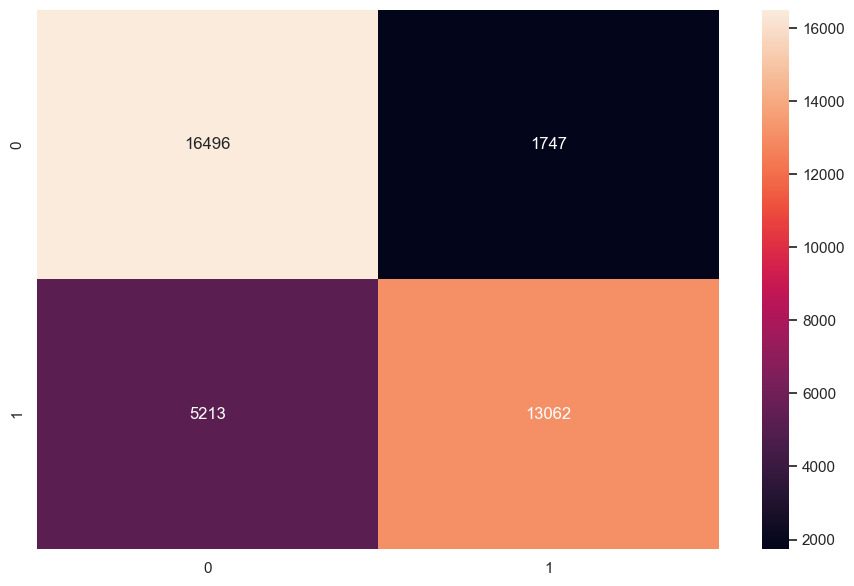

In [97]:
acc_gnb = accuracy_score(y_test,gnb.predict(X_test_2))
recall_gnb = recall_score(y_test,gnb.predict(X_test_2))
pre_gnb = recall_score(y_test,gnb.predict(X_test_2))
f1_gnb = f1_score(y_test,gnb.predict(X_test_2))
print('Accuracy is: ',acc_gnb)
print('Recall is: ',recall_gnb)
print('Precision is: ',pre_gnb)
print('F1 Score is: ',f1_gnb)
cm_4 = confusion_matrix(y_test,gnb.predict(X_test_2))
sns.heatmap(cm_1,annot=True,fmt="d")

## 3.5 Artificial Neural Network

Refer to ID/X Partners Virtual Internship Reading No. 10, “Introduction to Deep Learning”

In [134]:
# Define a batch size
bs = 128
# Both x_train and y_train can be combined in a single TensorDataset, which will be easier to iterate over and slice

# Convert X_train_2 and y_train to PyTorch tensors
X_train_2_tensor = torch.tensor(X_train_2, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_train_2_tensor, y_train_tensor)

# Pytorch’s DataLoader is responsible for managing batches.
# You can create a DataLoader from any Dataset. DataLoader makes it easier to iterate over batches
train_dl = DataLoader(train_ds, batch_size=bs)

In [135]:
#For the validation/test dataset
# Convert X_test_2 and y_test to PyTorch tensors
X_test_2_tensor = torch.tensor(X_test_2, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1)

test_ds = TensorDataset(X_test_2_tensor, y_test_tensor)
test_loader = DataLoader(test_ds, batch_size=32)

In [136]:
n_input_dim = X_train_2_tensor.shape[1]

#Layer size
n_hidden1 = 256
n_hidden2 = 512  # Number of hidden nodes
n_hidden3 = 256
n_hidden4 = 128
n_hidden5 = 64
n_hidden6 = 32
n_output =  1   # Number of output nodes = for binary classifier
patience = 5  # Number of epochs with no improvement before reducing LR


class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer_1 = nn.Linear(n_input_dim, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.layer_3 = nn.Linear(n_hidden2, n_hidden3)
        self.layer_4 = nn.Linear(n_hidden3, n_hidden4)
        self.layer_5 = nn.Linear(n_hidden4, n_hidden5)
        self.layer_6 = nn.Linear(n_hidden5, n_hidden6)
        self.layer_out = nn.Linear(n_hidden6, n_output)


        self.relu = nn.ReLU()
        self.sigmoid =  nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(n_hidden1)
        self.batchnorm2 = nn.BatchNorm1d(n_hidden2)
        self.batchnorm3 = nn.BatchNorm1d(n_hidden3)
        self.batchnorm4 = nn.BatchNorm1d(n_hidden4)
        self.batchnorm5 = nn.BatchNorm1d(n_hidden5)
        self.batchnorm6 = nn.BatchNorm1d(n_hidden6)


    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.relu(self.layer_5(x))
        x = self.batchnorm5(x)
        x = self.relu(self.layer_6(x))
        x = self.batchnorm6(x)
        x = self.dropout(x)
        x = self.sigmoid(self.layer_out(x))

        return x


ann = ANN()
print(ann)

ANN(
  (layer_1): Linear(in_features=30, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=512, bias=True)
  (layer_3): Linear(in_features=512, out_features=256, bias=True)
  (layer_4): Linear(in_features=256, out_features=128, bias=True)
  (layer_5): Linear(in_features=128, out_features=64, bias=True)
  (layer_6): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=Tru

In [137]:
# Loss Computation
loss_func = nn.BCELoss()
# Optimizer
learning_rate = 0.001
optimizer = torch.optim.Adam(ann.parameters(), lr=learning_rate)

epochs = 250

In [139]:
ann.train()
train_loss = []
for epoch in range(epochs):

    #Within each epoch run the subsets of data = batch sizes.
    for xb, yb in train_dl:
        y_pred = ann(xb)            # Forward Propagation
        loss = loss_func(y_pred, yb)  # Loss Computation
        optimizer.zero_grad()         # Clearing all previous gradients, setting to zero
        loss.backward()               # Back Propagation
        optimizer.step()              # Updating the parameters

    print("Loss in iteration "+str(epoch)+" is: "+str(loss.item()))
    train_loss.append(loss.item())
print('Last iteration loss value: '+str(loss.item()))

Loss in iteration 0 is: 0.24275057017803192
Loss in iteration 1 is: 0.23334942758083344
Loss in iteration 2 is: 0.23714175820350647
Loss in iteration 3 is: 0.2417241483926773
Loss in iteration 4 is: 0.2395389974117279
Loss in iteration 5 is: 0.22420477867126465
Loss in iteration 6 is: 0.22705984115600586
Loss in iteration 7 is: 0.2649109959602356
Loss in iteration 8 is: 0.23187944293022156
Loss in iteration 9 is: 0.2533549964427948
Loss in iteration 10 is: 0.23997902870178223
Loss in iteration 11 is: 0.19267389178276062
Loss in iteration 12 is: 0.2051488310098648
Loss in iteration 13 is: 0.21442042291164398
Loss in iteration 14 is: 0.2141873836517334
Loss in iteration 15 is: 0.19591501355171204
Loss in iteration 16 is: 0.19292080402374268
Loss in iteration 17 is: 0.19750027358531952
Loss in iteration 18 is: 0.18808992207050323
Loss in iteration 19 is: 0.20028245449066162
Loss in iteration 20 is: 0.20709599554538727
Loss in iteration 21 is: 0.21830785274505615
Loss in iteration 22 is: 0

KeyboardInterrupt: 

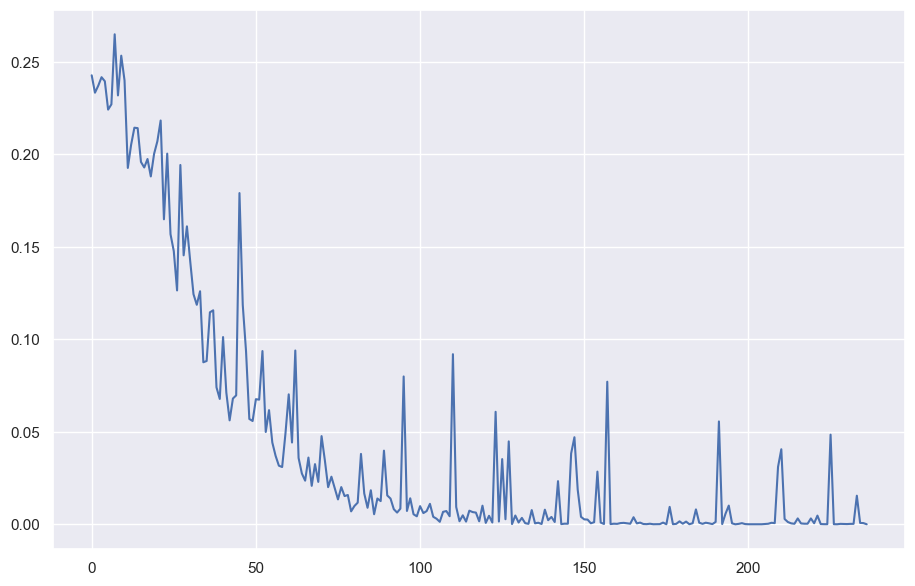

In [140]:
# Plot loss graph overtime

plt.plot(train_loss)
plt.show()

In [141]:
# Make predictions on the test set
with torch.no_grad():
    outputs = ann(X_test_2_tensor)
    predicted_labels = (outputs >= 0.5).float()

In [142]:
import itertools

y_pred_list = []
ann.eval()
#Since we don't need model to back propagate the gradients in test set we use torch.no_grad()
# reduces memory usage and speeds up computation
with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = ann(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

#Takes arrays and makes them list of list for each batch
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#flattens the lists in sequence
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

In [146]:
y_true_test = y_test.values.ravel()
conf_matrix = confusion_matrix(y_true_test ,ytest_pred)
acc_ann = accuracy_score(y_true_test,ytest_pred)
recall_ann = recall_score(y_true_test,ytest_pred)
pre_ann = precision_score(y_true_test,ytest_pred)
f1_ann = f1_score(y_true_test,ytest_pred)
print("Confusion Matrix of the Test Set")
print("-----------")
print(conf_matrix)
print("Accuracy: "+str(acc_ann))
print("Recall: "+str(recall_ann))
print('Recall is: '+str(pre_ann))
print("F1 Score: "+str(f1_ann))

Confusion Matrix of the Test Set
-----------
[[16777  1466]
 [ 2733 15542]]
Accuracy: 0.8850156087408949
Recall: 0.8504514363885088
Recall is: 0.9138052681091251
F1 Score: 0.8809908454496499


---

# 4. Conclusion

Refer to ID/X Partners Virtual Internship Reading No. 9, “Model Evaluation Metrics”

We have tested 4 machine learning models for our dateset. The 4 models are:
1. Random Forest
2. K-Nearest Neighbors
3. XGBoost
4. Naive Bayes
5. Artificial Neural Network

In [144]:
print('Random Forest Classifier ','\n','Accuracy: ',acc_rf, 'Recall: ',recall_rf, 'Precision: ', pre_rf, 'F1 Score: ',f1_rf)
print('K-Nearest Neighbors ','\n','Accuracy: ',acc_knn,'Recall: ',recall_knn,'Precision: ', pre_knn, 'F1 Score: ',f1_knn)
print('XGBoost ','\n','Accuracy: ',acc_xgb,'Recall: ',recall_xgb,'Precision: ', pre_xgb,'F1 Score:',f1_xgb)
print('Naive Bayes ','\n','Accuracy: ',acc_gnb,'Recall: ',recall_gnb,'Precision: ', pre_gnb,'F1 Score: ',f1_gnb)
print('Artificial Neural Network','\n','Accuracy: ',acc_ann,'Recall: ',recall_ann,'Precision: ', pre_ann,'F1 Score: ',f1_ann)

Random Forest Classifier  
 Accuracy:  0.9099074429048688 Recall:  0.8435020519835841 Precision:  0.9728621016093405 F1 Score:  0.9035756154747948
K-Nearest Neighbors  
 Accuracy:  0.8094090585464703 Recall:  0.7147469220246238 Precision:  0.8820311972449186 F1 Score:  0.789626405513239
XGBoost  
 Accuracy:  0.8936688756229805 Recall:  0.800328317373461 Precision:  0.9842530282637955 F1 Score: 0.8828127357778784
Naive Bayes  
 Accuracy:  0.7214524344159045 Recall:  0.4467305061559508 Precision:  0.4467305061559508 F1 Score:  0.6161509433962266
Artificial Neural Network 
 Accuracy:  0.8850156087408949 Recall:  0.8504514363885088 Precision:  0.9138052681091251 F1 Score:  0.8809908454496499


From the metrics, it appears that the **Random Forest  is the best performing model**, followed by ANN, and XGBoost have relatively higher accuracy, precision, recall, and F1 Score compared to the other models. Both these models seem to have a good balance between precision and recall, which is essential in a credit risk prediction scenario. A higher F1 Score indicates better overall performance in predicting both positive and negative cases.

However, the final choice of the best model should also consider factors such as **interpretability, computational complexity, and the business requirements**. Random Forest, ANN, and XGBoost are models that can provide good predictive performance but might be less interpretable than simpler models like Naive Bayes.

# 5. References

- https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- https://pytorch.org/docs/stable/nn.html
- ID/X Partners Virtual Internship Readings
- Google Advanced Data Analytics Professional Certification
- https://www.kaggle.com/